In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import get_data as data_call

import matplotlib
matplotlib.font_manager._rebuild()

### Data Cleaning 
From the `get_data.py`, we are able to get the liked song and output into a csv. We have a list a favorite song with its respective ids and artists. 
<br> 
In this section, we are getting the audio features from spotify through spotipy to do our song analysis
<br> 
In this data, we only taking first 250 songs and index 0 as the recently added

In [2]:
fav_song_list = pd.read_csv('fav_song_list.csv')
fav_song_list.head()

,song_name,song_id,artist_name,artist_id,popularity
0,If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,JP Saxe,66W9LaWS0DPdL7Sz8iYGYe,85
1,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,3OC84eKMxRJ4x0Hcwl9i4i,Crowd Lu,2JBUyLiFvpFPWdZGqIGYLD,72
2,流著淚說分手,7LMPRmLVC5seyuf5n6gKZi,小文,1klqNQAhhI5d4P5WWpBIEe,20
3,阿拉斯加海湾,5DCNAwyomUF3LXunq4NSpJ,Priscilla Abby,0zFBdI3ErhNDcIPAKiGoL0,57
4,飞鸟和蝉,3IveWAHTMxZA4KYBPnylq5,Ren Ran,6f4srX54JFrLNK4aTJe2Sc,51


In [3]:
# authentication, one of the function that I have wrote in get_data_py
sp = data_call.create_user_auth()

In [4]:
#requesting audio features from Spotify
audio_feature_sample=sp.audio_features(fav_song_list['song_id'][2])
print(audio_feature_sample)

[{'danceability': 0.65, 'energy': 0.148, 'key': 10, 'loudness': -13.396, 'mode': 0, 'speechiness': 0.0396, 'acousticness': 0.912, 'instrumentalness': 0, 'liveness': 0.119, 'valence': 0.276, 'tempo': 77.936, 'type': 'audio_features', 'id': '7LMPRmLVC5seyuf5n6gKZi', 'uri': 'spotify:track:7LMPRmLVC5seyuf5n6gKZi', 'track_href': 'https://api.spotify.com/v1/tracks/7LMPRmLVC5seyuf5n6gKZi', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7LMPRmLVC5seyuf5n6gKZi', 'duration_ms': 250093, 'time_signature': 4}]


In [5]:
# creating a list of audio features(appending each dictionary into the list)
list_of_audio_features=[]
for index, row in fav_song_list.iterrows():
    audio_features= sp.audio_features(row["song_id"])
    list_of_audio_features.append(audio_features[0])

In [6]:
#creating a data frame of audio features with the list 
audio_features_list=pd.DataFrame(list_of_audio_features)

In [7]:
# renaming id to song_id to allow overlapping
audio_features_list=audio_features_list.rename(columns={"id" : "song_id"})

In [8]:
# join the overlap which is song_id
df = audio_features_list.combine_first(fav_song_list)

#getting the list of the columns
cols = df.columns.tolist()

#reordering the columns and our final dataset has been set into df
df = df[['song_name','song_id','artist_id','artist_name','popularity','acousticness','danceability','energy','instrumentalness','key',
         'liveness','loudness','mode','speechiness','tempo','valence','time_signature','duration_ms',
         'track_href','type','uri','analysis_url']]
df

,song_name,song_id,artist_id,artist_name,popularity,acousticness,danceability,energy,instrumentalness,key,...,mode,speechiness,tempo,valence,time_signature,duration_ms,track_href,type,uri,analysis_url
0,If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,66W9LaWS0DPdL7Sz8iYGYe,JP Saxe,85.0,0.8660,0.464,0.473,0.000000,1,...,1,0.1290,75.801,0.604,4,208687,https://api.spotify.com/v1/tracks/2kJwzbxV2ppx...,audio_features,spotify:track:2kJwzbxV2ppxnQoYw4GLBZ,https://api.spotify.com/v1/audio-analysis/2kJw...
1,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,3OC84eKMxRJ4x0Hcwl9i4i,2JBUyLiFvpFPWdZGqIGYLD,Crowd Lu,72.0,0.8730,0.425,0.201,0.000000,10,...,1,0.0373,136.328,0.267,4,320166,https://api.spotify.com/v1/tracks/3OC84eKMxRJ4...,audio_features,spotify:track:3OC84eKMxRJ4x0Hcwl9i4i,https://api.spotify.com/v1/audio-analysis/3OC8...
2,流著淚說分手,7LMPRmLVC5seyuf5n6gKZi,1klqNQAhhI5d4P5WWpBIEe,小文,20.0,0.9120,0.650,0.148,0.000000,10,...,0,0.0396,77.936,0.276,4,250093,https://api.spotify.com/v1/tracks/7LMPRmLVC5se...,audio_features,spotify:track:7LMPRmLVC5seyuf5n6gKZi,https://api.spotify.com/v1/audio-analysis/7LMP...
3,阿拉斯加海湾,5DCNAwyomUF3LXunq4NSpJ,0zFBdI3ErhNDcIPAKiGoL0,Priscilla Abby,57.0,0.7380,0.630,0.309,0.000000,10,...,1,0.0350,117.814,0.155,4,237841,https://api.spotify.com/v1/tracks/5DCNAwyomUF3...,audio_features,spotify:track:5DCNAwyomUF3LXunq4NSpJ,https://api.spotify.com/v1/audio-analysis/5DCN...
4,飞鸟和蝉,3IveWAHTMxZA4KYBPnylq5,6f4srX54JFrLNK4aTJe2Sc,Ren Ran,51.0,0.7490,0.569,0.567,0.000000,10,...,1,0.0527,147.962,0.321,4,296031,https://api.spotify.com/v1/tracks/3IveWAHTMxZA...,audio_features,spotify:track:3IveWAHTMxZA4KYBPnylq5,https://api.spotify.com/v1/audio-analysis/3Ive...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,When Will I Be Loved,0rOFRZ39bdoLADXcb5UZus,4ACplpEqD6JIVgKrafauzs,The Everly Brothers,0.0,0.1560,0.597,0.487,0.000000,11,...,1,0.0336,118.104,0.711,4,115310,https://api.spotify.com/v1/tracks/0rOFRZ39bdoL...,audio_features,spotify:track:0rOFRZ39bdoLADXcb5UZus,https://api.spotify.com/v1/audio-analysis/0rOF...
246,Mercy,1dKm4a7TOYFzzTQvU59C59,37NqXwtb6nIEqRt4EJSoIO,Duffy,0.0,0.2660,0.793,0.859,0.000356,0,...,1,0.0332,129.912,0.964,4,219920,https://api.spotify.com/v1/tracks/1dKm4a7TOYFz...,audio_features,spotify:track:1dKm4a7TOYFzzTQvU59C59,https://api.spotify.com/v1/audio-analysis/1dKm...
247,Don't Rain On My Parade (Glee Cast Version),7emV91bLzV662TpX9Tmxnr,0SCbttzoZTnLFebDYmAWCm,Glee Cast,57.0,0.5980,0.483,0.691,0.000000,4,...,1,0.0805,79.666,0.597,4,165493,https://api.spotify.com/v1/tracks/7emV91bLzV66...,audio_features,spotify:track:7emV91bLzV662TpX9Tmxnr,https://api.spotify.com/v1/audio-analysis/7emV...
248,"My Favourite Things (From ""The Sound of Music"")",51JrbFRTiIZqJFNRj2rNAG,2oQJQUIpJFFnfKvHJA0xBu,The City of Prague Philharmonic Orchestra,11.0,0.9340,0.577,0.224,0.000035,4,...,0,0.0504,98.103,0.579,3,124533,https://api.spotify.com/v1/tracks/51JrbFRTiIZq...,audio_features,spotify:track:51JrbFRTiIZqJFNRj2rNAG,https://api.spotify.com/v1/audio-analysis/51Jr...


In [9]:
#dropping the columns that we do not need
df=df.drop(columns=['track_href','type','analysis_url'])
df

,song_name,song_id,artist_id,artist_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,duration_ms,uri
0,If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,66W9LaWS0DPdL7Sz8iYGYe,JP Saxe,85.0,0.8660,0.464,0.473,0.000000,1,0.1090,-10.086,1,0.1290,75.801,0.604,4,208687,spotify:track:2kJwzbxV2ppxnQoYw4GLBZ
1,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,3OC84eKMxRJ4x0Hcwl9i4i,2JBUyLiFvpFPWdZGqIGYLD,Crowd Lu,72.0,0.8730,0.425,0.201,0.000000,10,0.1110,-11.961,1,0.0373,136.328,0.267,4,320166,spotify:track:3OC84eKMxRJ4x0Hcwl9i4i
2,流著淚說分手,7LMPRmLVC5seyuf5n6gKZi,1klqNQAhhI5d4P5WWpBIEe,小文,20.0,0.9120,0.650,0.148,0.000000,10,0.1190,-13.396,0,0.0396,77.936,0.276,4,250093,spotify:track:7LMPRmLVC5seyuf5n6gKZi
3,阿拉斯加海湾,5DCNAwyomUF3LXunq4NSpJ,0zFBdI3ErhNDcIPAKiGoL0,Priscilla Abby,57.0,0.7380,0.630,0.309,0.000000,10,0.1040,-11.415,1,0.0350,117.814,0.155,4,237841,spotify:track:5DCNAwyomUF3LXunq4NSpJ
4,飞鸟和蝉,3IveWAHTMxZA4KYBPnylq5,6f4srX54JFrLNK4aTJe2Sc,Ren Ran,51.0,0.7490,0.569,0.567,0.000000,10,0.2220,-7.142,1,0.0527,147.962,0.321,4,296031,spotify:track:3IveWAHTMxZA4KYBPnylq5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,When Will I Be Loved,0rOFRZ39bdoLADXcb5UZus,4ACplpEqD6JIVgKrafauzs,The Everly Brothers,0.0,0.1560,0.597,0.487,0.000000,11,0.2210,-9.586,1,0.0336,118.104,0.711,4,115310,spotify:track:0rOFRZ39bdoLADXcb5UZus
246,Mercy,1dKm4a7TOYFzzTQvU59C59,37NqXwtb6nIEqRt4EJSoIO,Duffy,0.0,0.2660,0.793,0.859,0.000356,0,0.1330,-3.774,1,0.0332,129.912,0.964,4,219920,spotify:track:1dKm4a7TOYFzzTQvU59C59
247,Don't Rain On My Parade (Glee Cast Version),7emV91bLzV662TpX9Tmxnr,0SCbttzoZTnLFebDYmAWCm,Glee Cast,57.0,0.5980,0.483,0.691,0.000000,4,0.0918,-5.223,1,0.0805,79.666,0.597,4,165493,spotify:track:7emV91bLzV662TpX9Tmxnr
248,"My Favourite Things (From ""The Sound of Music"")",51JrbFRTiIZqJFNRj2rNAG,2oQJQUIpJFFnfKvHJA0xBu,The City of Prague Philharmonic Orchestra,11.0,0.9340,0.577,0.224,0.000035,4,0.1330,-12.131,0,0.0504,98.103,0.579,3,124533,spotify:track:51JrbFRTiIZqJFNRj2rNAG


### Data Analysis 
We had got the data that we need from Spotify and all the audio features are now in a data frame, we are ready to do our song analysis. 

Before ploting any graph, we need to understand our dataset. 
##### Understanding our Dataset 
* basic identifier of the song which is the song name with its id and the artist(s) that is(are) performing
* `acousticness` = measurement of the acoustic feature of the song , 1 being high probability of acoustic 
* `danceability` = measurement of the suitability for a dance
* `energy` = measurement of intensity
* `instrumentalness` = measurement it likelihood of being an instrumental song (no vocal content)
* `key` = pitches of the song (C= 0, C#/Db=1...) (12 notes in an octave)
* `liveness` = detect the presence of live audience 
* `loudness` = how loud of the song in decibles (dB)
* `mode` = major or minor 
* `speechiness` = detect the spoken words in a track
* `tempo` = bpm of the track
* `valence` = mood of the song 
* `time_signature` = the number of beats in each bar
* `duration_ms` = how long of the song in miliseconds
* `popularity` = how popular of the song based on the number of plays on that song and how recent is that play
For more clearer information check the spotify api : https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject

I always think that I listen to some slow and mellow music. We can start by plotting the average tempo the list

In [24]:
# getting the average tempo of all songs 
avg_tempo = df["tempo"].mean()
print("Average Tempo: " + str(avg_tempo))
max_tempo = df["tempo"].max()
print("Max Tempo: " + str(max_tempo))
min_tempo = df["tempo"].min()
print("Min Tempo: "+ str(min_tempo))
max_index = df["tempo"].idxmax()
max_tempo_track = df.iloc[max_index]
print("Track with max tempo: " + max_tempo_track["song_name"])
min_index = df["tempo"].idxmin()
min_tempo_track= df.iloc[min_index]
print("Track with min tempo: " + min_tempo_track["song_name"])

Average Tempo: 118.735636
Max Tempo: 201.294
Min Tempo: 68.534
Track with max tempo: 從開始到現在 (電視劇《冬季戀歌》正宗主題曲中文版)
Track with min tempo: Lover


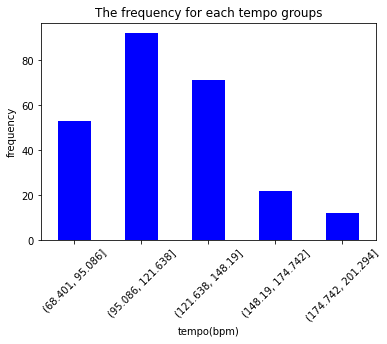

In [22]:
split_to_five = pd.cut(df["tempo"],bins=5)
ax = split_to_five.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.xticks(rotation = 45)
plt.xlabel("tempo(bpm)")
plt.ylabel("frequency")
plt.title("The frequency for each tempo groups")
plt.show()

In [15]:
split_to_five

0       (68.401, 95.086]
1      (121.638, 148.19]
2       (68.401, 95.086]
3      (95.086, 121.638]
4      (121.638, 148.19]
             ...        
245    (95.086, 121.638]
246    (121.638, 148.19]
247     (68.401, 95.086]
248    (95.086, 121.638]
249    (95.086, 121.638]
Name: tempo, Length: 250, dtype: category
Categories (5, interval[float64]): [(68.401, 95.086] < (95.086, 121.638] < (121.638, 148.19] < (148.19, 174.742] < (174.742, 201.294]]

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

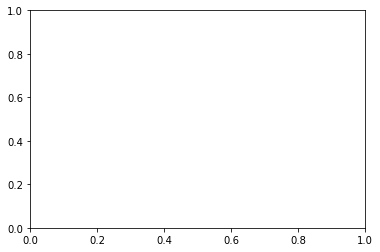

In [12]:
import seaborn as sns 

sns.histplot(data=split_to_five)

Tempo is calculated with beats per min (bpm), where beat is a reason that why we clap or stump our feet while listen to a track. 
<br>
We can use a simple ratio to know how fast 118.7 bpm. As the name bpm is beat per min, if we have a 60bpm means that every 1 second is 1 beat, if we have 119bpm means that it is almost 2 beats per second